In [5]:
# !pip install bs4
#!pip install nltk
#!pip install twython

In [6]:
#nltk.download('vader_lexicon')


In [7]:
# import important libraries
from urllib.request import urlopen,Request
from bs4 import BeautifulSoup
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd 
import matplotlib.pyplot as plt

In [8]:
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AMZN', 'AMD', 'FB']
news_tables = {}
for ticker in tickers:
  url = finviz_url + ticker

  req = Request(url=url, headers={'user-agent':'my-app'})
  response = urlopen(req)
  #print(response)


  html = BeautifulSoup(response, 'html')
  news_table = html.find(id ='news-table')
  news_tables[ticker] = news_table
  

In [9]:
news_tables

{'AMD': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
 <tr><td align="right" style="white-space:nowrap" width="130">Jun-09-22 07:17PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/amd-details-strategy-drive-next-231700947.html" target="_blank">AMD Details Strategy to Drive Next Phase of Growth Across $300 Billion Market for High-Performance and Adaptive Computing Solutions</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> GlobeNewswire</span></div></div></td></tr>
 <tr><td align="right" width="130">06:49PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/amd-flags-slow-market-pcs-224920232.html" target="_blank">AMD flags slow market for PCs in 2022</a></div><div class="news-link-right"><span style="co

In [10]:
# amzn_data = news_tables['AMZN']
# amzn_rows = amzn_data.findAll('tr')

# for index, row in enumerate(amzn_rows):
#   title = row.a.text
#   timestamp = row.td.text
#   print(timestamp + " " + title)

  #print(title)

**Storing time,date,ticker and title data into single list**

In [11]:
parsed_data = []
for ticker, news_table in news_tables.items():
  for row in news_table.findAll('tr'):
    title = row.a.text
    date_data = row.td.text.split(' ')

    if len(date_data) == 1:
      time = date_data[0]
    else:
      date = date_data[0]
      time = date_data[1]
    parsed_data.append([ticker, date, time, title])
  print(parsed_data)

[['AMZN', 'Jun-10-22', '03:07AM\xa0\xa0', 'Amazon Plans to Pull Out of $7.7 Billion Race for Cricket Rights'], ['AMZN', 'Jun-10-22', '02:44AM\xa0\xa0', 'BOE Says\xa0UK Banks Are No Longer Too Big to Fail: The London Rush'], ['AMZN', 'Jun-10-22', '01:51AM\xa0\xa0', 'Ukraine Latest: Russian Forces Slam East; Blinken Bashes Court'], ['AMZN', 'Jun-10-22', '12:14AM\xa0\xa0', 'Bolsonaro Fears Worst as Writer, Expert Missing in Amazon'], ['AMZN', 'Jun-09-22', '08:00PM\xa0\xa0', 'Bezos and Ambani Set to Battle Over $7.7 Billion Cricket Rights'], ['AMZN', 'Jun-09-22', '06:20PM\xa0\xa0', 'Securities Litigation Partner James (Josh) Wilson Encourages Investors Who Suffered Losses Exceeding $250,000 In Amazon To Contact Him Directly To Discuss Their Options'], ['AMZN', 'Jun-09-22', '06:11PM\xa0\xa0', 'Heres Why You Should Consider Investing in Amazon (AMZN)'], ['AMZN', 'Jun-09-22', '05:39PM\xa0\xa0', "Amazon's Dave Clark to leave millions on the table with departure"], ['AMZN', 'Jun-09-22', '05:35P

**Creating DataFrame**

In [12]:
df = pd.DataFrame(parsed_data, columns = ['ticker', 'date', 'time', 'title'])
df.head()


,ticker,date,time,title
0,AMZN,Jun-10-22,03:07AM,Amazon Plans to Pull Out of $7.7 Billion Race ...
1,AMZN,Jun-10-22,02:44AM,BOE Says UK Banks Are No Longer Too Big to Fai...
2,AMZN,Jun-10-22,01:51AM,Ukraine Latest: Russian Forces Slam East; Blin...
3,AMZN,Jun-10-22,12:14AM,"Bolsonaro Fears Worst as Writer, Expert Missin..."
4,AMZN,Jun-09-22,08:00PM,Bezos and Ambani Set to Battle Over $7.7 Billi...


**Initializing SentimentIntensityAnalyzer**

In [13]:
vader = SentimentIntensityAnalyzer()

**Finding polarity score for titles in the dataframe**

In [14]:
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df.head()


,ticker,date,time,title,compound
0,AMZN,Jun-10-22,03:07AM,Amazon Plans to Pull Out of $7.7 Billion Race ...,0.1779
1,AMZN,Jun-10-22,02:44AM,BOE Says UK Banks Are No Longer Too Big to Fai...,-0.6908
2,AMZN,Jun-10-22,01:51AM,Ukraine Latest: Russian Forces Slam East; Blin...,-0.3818
3,AMZN,Jun-10-22,12:14AM,"Bolsonaro Fears Worst as Writer, Expert Missin...",-0.8126
4,AMZN,Jun-09-22,08:00PM,Bezos and Ambani Set to Battle Over $7.7 Billi...,-0.3818


**Converting string into data time format**

In [15]:
df['date'] = pd.to_datetime(df.date).dt.date


**Visualizing the obtained results**

In [16]:

plt.figure(figsize=(10,8))
mean_df = df.groupby(['ticker', 'date']).mean()
mean_df = mean_df.unstack()
mean_df = mean_df.xs('compound', axis="columns").transpose()
print(mean_df)

ticker           AMD      AMZN        FB
date                                    
2022-05-19 -0.103517       NaN       NaN
2022-05-20  0.331825       NaN       NaN
2022-05-21 -0.341200       NaN       NaN
2022-05-23  0.037975       NaN       NaN
2022-05-24  0.028600       NaN       NaN
2022-05-25 -0.039883       NaN       NaN
2022-05-26  0.036300       NaN       NaN
2022-05-27 -0.352300       NaN       NaN
2022-05-28  0.170000       NaN       NaN
2022-05-29  0.510600       NaN       NaN
2022-05-30  0.067433       NaN       NaN
2022-05-31  0.251675       NaN       NaN
2022-06-01  0.330589       NaN       NaN
2022-06-02  0.173800       NaN  0.101356
2022-06-03  0.251745       NaN -0.073100
2022-06-04  0.101150       NaN -0.105340
2022-06-05  0.000000       NaN  0.000000
2022-06-06  0.106975       NaN  0.221282
2022-06-07  0.292386 -0.054944  0.032456
2022-06-08  0.128617  0.157624  0.083895
2022-06-09  0.100467  0.074212 -0.020294
2022-06-10       NaN -0.426825 -0.510600


<Figure size 720x576 with 0 Axes>

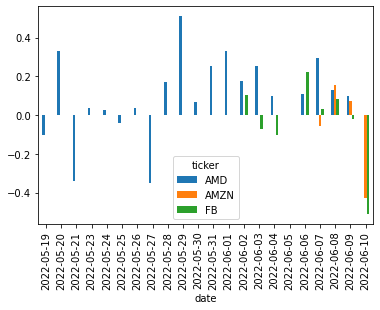

In [17]:
mean_df.plot(kind='bar')
plt.show()